<a href="https://colab.research.google.com/github/limogg/blood_antigen/blob/main/krew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/files')

Mounted at /content/files


In [2]:
import pandas as pd

dataframe = pd.read_table('/content/files/MyDrive/ml/flow-cytometry-40k.txt', sep=' ', header=None)

In [3]:
COLUMN_TO_DROP = 0
AXIS = 1
dataframe = dataframe.drop([COLUMN_TO_DROP],axis = AXIS)

In [4]:
dataframe.columns = ['FITC-CD3','PE-CD8', 'ECD-CD19', 'PC5-CD45','PC7-CD3']

In [5]:
dataframe

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [6]:
dataframe_copy = dataframe
dataframe_copy

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [7]:
ROW_AXIS = 0

dataframe_copy.dropna(axis=ROW_AXIS, inplace = True)

array([[<Axes: title={'center': 'FITC-CD3'}>,
        <Axes: title={'center': 'PE-CD8'}>],
       [<Axes: title={'center': 'ECD-CD19'}>,
        <Axes: title={'center': 'PC5-CD45'}>],
       [<Axes: title={'center': 'PC7-CD3'}>, <Axes: >]], dtype=object)

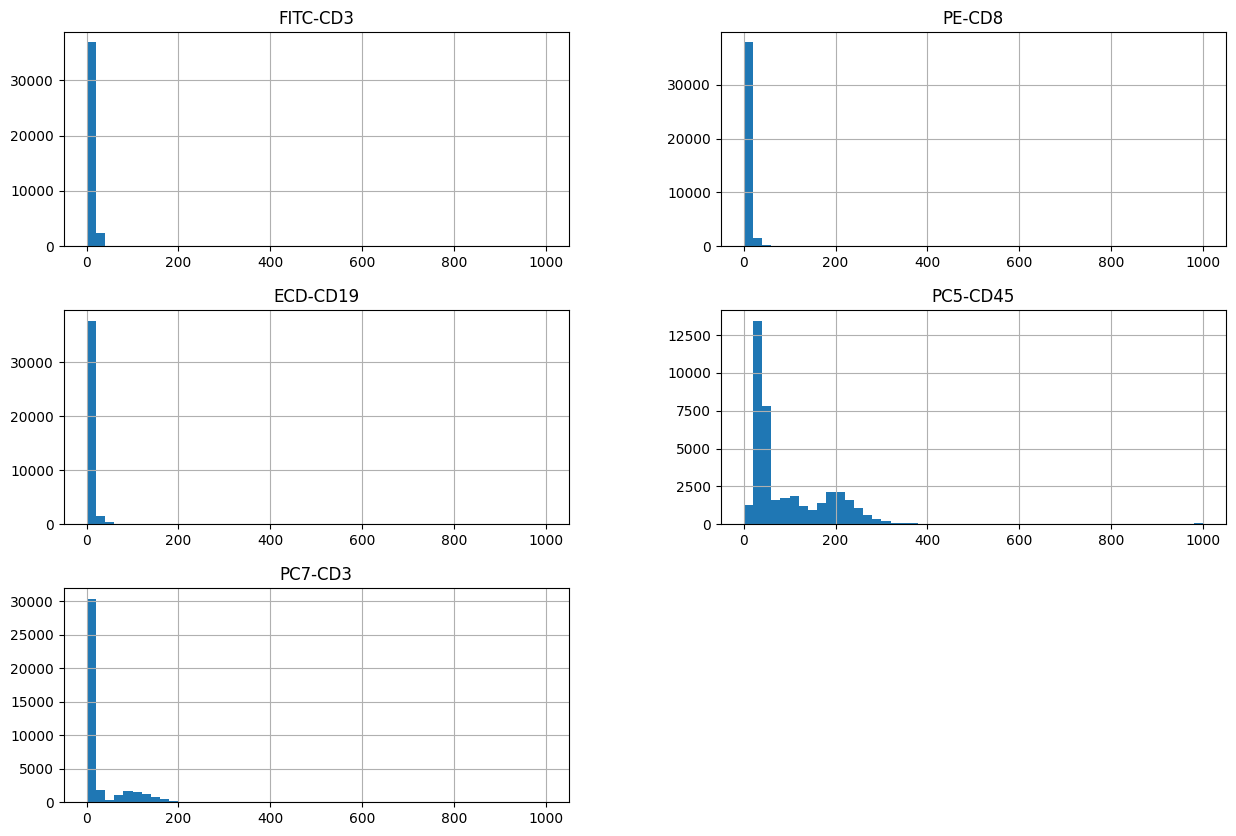

In [8]:
dataframe.hist(bins = 50, figsize=(15,10))

In [9]:
dataframe.describe(percentiles=[.1, .9])

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,8.245865,7.956326,6.102041,97.956974,30.004937
std,40.784917,27.655936,23.554925,94.014033,53.123582
min,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.834466,1.464845,0.981332,26.580836,3.565696
50%,2.033236,3.025535,2.521517,49.346971,8.089073
90%,18.660563,15.688911,8.609875,224.640107,108.062847
max,999.970436,999.970436,999.970436,999.970436,999.970436


In [10]:
dataframe = dataframe[(dataframe["FITC-CD3"]< 18) & (dataframe['FITC-CD3']>0.8)]

In [11]:
dataframe = dataframe[(dataframe['PE-CD8']<15) & (dataframe['PE-CD8']>1.4)]

In [12]:
dataframe = dataframe[(dataframe['ECD-CD19']< 8) & (dataframe['ECD-CD19']>1)]

In [13]:
dataframe = dataframe[(dataframe['PC5-CD45']< 225) & (dataframe['PC5-CD45']>26)]

In [14]:
dataframe = dataframe[(dataframe['PC7-CD3']< 108) & (dataframe['PC7-CD3']>3.5)]

In [15]:
dataframe.describe()

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,21813.000000,21813.000000,21813.000000,21813.000000,21813.000000
mean,2.999141,3.675652,2.719230,67.941437,11.533780
std,2.694437,2.086349,1.277543,44.461168,15.433640
min,0.800134,1.400949,1.000405,26.001001,3.500942
25%,1.667978,2.305033,1.770975,36.926305,6.047255
50%,2.247813,2.936366,2.400401,47.149703,7.880218
75%,3.189090,4.448895,3.367427,92.743008,10.742198
max,17.999666,14.954581,7.998474,224.762177,107.971294


In [16]:
dataframe

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
4,6.203657,5.125051,2.734187,95.794769,12.134564
5,2.429011,2.443316,1.492502,45.654340,4.559521
6,2.449992,2.475741,3.108028,34.454379,8.450516
...,...,...,...,...,...
39985,1.700403,2.182009,1.597406,34.881625,8.943566
39992,2.161982,2.335551,1.026155,33.355745,6.816871
39993,1.338006,3.498081,1.290323,81.390458,7.633217
39995,2.020838,2.534869,1.887323,59.295711,9.926805


array([[<Axes: title={'center': 'FITC-CD3'}>,
        <Axes: title={'center': 'PE-CD8'}>],
       [<Axes: title={'center': 'ECD-CD19'}>,
        <Axes: title={'center': 'PC5-CD45'}>],
       [<Axes: title={'center': 'PC7-CD3'}>, <Axes: >]], dtype=object)

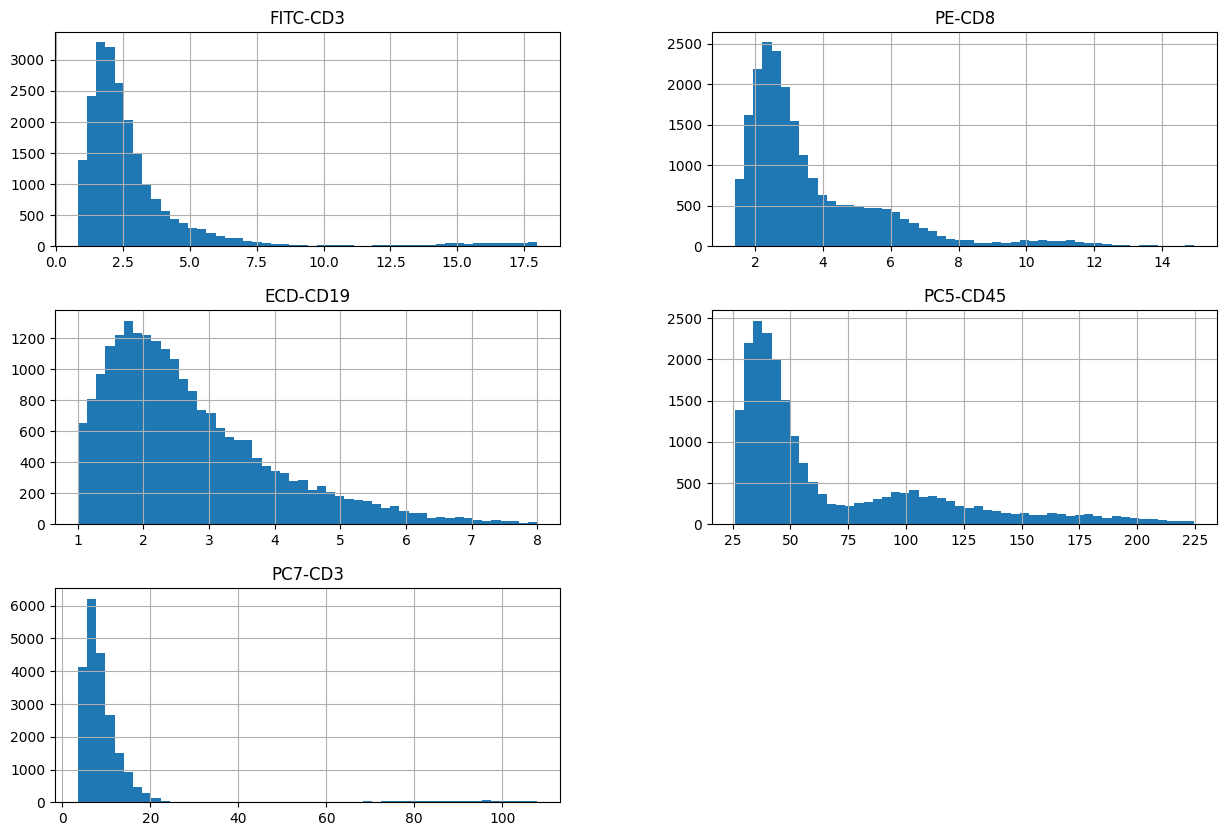

In [17]:
dataframe.hist(bins = 50, figsize=(15,10))

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataframe_standarized = scaler.fit_transform(dataframe)

dataframe_standarized

array([[ 0.48851365,  0.77928765,  0.9187156 ,  1.09186025, -0.01613016],
       [-0.35813562, -0.14225183,  0.23342061, -0.09905003, -0.28765035],
       [ 1.18933537,  0.69472178,  0.01170752,  0.62647859,  0.03892776],
       ...,
       [-0.61651939, -0.08511272, -1.11850666,  0.30249609, -0.25273708],
       [-0.36309093, -0.54679669, -0.65119221, -0.19446013, -0.10412396],
       [ 0.2956107 ,  1.27754064,  0.42079429,  1.74325728,  0.16035179]])

In [19]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()

dataframe_normalized = normalization.fit_transform(dataframe)

dataframe_normalized

array([[0.20438037, 0.28778497, 0.41332788, 0.45524336, 0.07450819],
       [0.07174938, 0.14593301, 0.28822567, 0.18885306, 0.03439682],
       [0.3141669 , 0.2747678 , 0.24775143, 0.35114387, 0.08264184],
       ...,
       [0.03127253, 0.1547284 , 0.04142818, 0.27867342, 0.03955452],
       [0.07097311, 0.08366169, 0.12673753, 0.16751113, 0.06150897],
       [0.17416135, 0.36448072, 0.32243118, 0.60095194, 0.10057967]])

In [20]:
dataframe_avrage = dataframe.describe().loc['mean'].values
dataframe_avrage

array([ 2.99914114,  3.67565153,  2.71923035, 67.94143739, 11.53378027])

In [21]:
dataframe_standarized_avrage = []

NUMBER_OF_FEATURES = 5

for feature in range(NUMBER_OF_FEATURES):
  dataframe_standarized_avrage.append(dataframe_standarized[:,feature].mean())

dataframe_standarized_avrage

[-8.729906623743037e-17,
 6.31941001867966e-17,
 1.275283001192313e-16,
 2.8144176578037254e-16,
 -6.31941001867966e-17]

In [22]:
dataframe_normalized_avrage = []

for feature in range(NUMBER_OF_FEATURES):
  dataframe_normalized_avrage.append(dataframe_normalized[:, feature].mean())

dataframe_normalized_avrage

[0.12785275390230386,
 0.16782974281942675,
 0.24561419555011832,
 0.21100919653997152,
 0.07689108265671575]

In [23]:
from sklearn.decomposition import PCA

NUMBER_OF_DIMENSIONS = 2

pca = PCA(n_components= NUMBER_OF_DIMENSIONS)

In [24]:
scalar = StandardScaler()

normalized_data = scalar.fit_transform(dataframe)

data_reduced = pca.fit_transform(normalized_data)

data_reduced

array([[ 1.44853501, -0.70214329],
       [-0.30968526, -0.43516881],
       [ 1.17631747,  0.36003302],
       ...,
       [-0.74159251,  0.38229508],
       [-0.82573751,  0.36625799],
       [ 1.77898786, -0.50143551]])

In [25]:
information_retaind = pca.explained_variance_ratio_

information_retaind

array([0.75528276, 0.11975689])

In [26]:
import numpy

numpy.sum(information_retaind)

0.8750396426429256

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

MINIMUM_CLUSTERS = 2
MAXIMUM_CLUSTERS = 15
ITERATION_VALUE = 1

distorions = []
silhouette_scores = []

for cluster in range(MINIMUM_CLUSTERS, MAXIMUM_CLUSTERS, ITERATION_VALUE):
  model = KMeans(n_clusters = cluster, init = "k-means++",n_init = 10, max_iter=100, random_state=0)

  model.fit(normalized_data)

  distorions.append(model.inertia_)
  silhouette_scores.append(silhouette_score(normalized_data, model.labels_, metric = 'euclidean'))

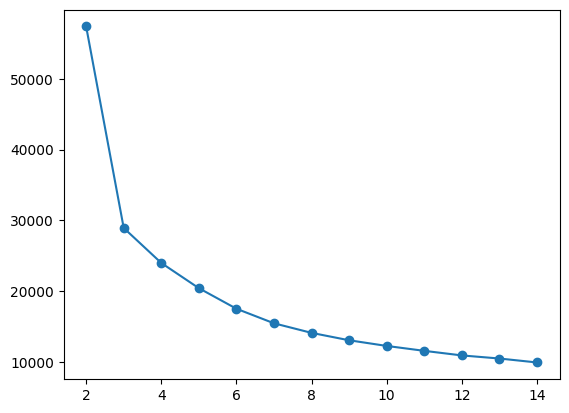

In [33]:
import matplotlib.pyplot as pyplot

pyplot.plot(range(MINIMUM_CLUSTERS,MAXIMUM_CLUSTERS,ITERATION_VALUE), distorions, marker= 'o')

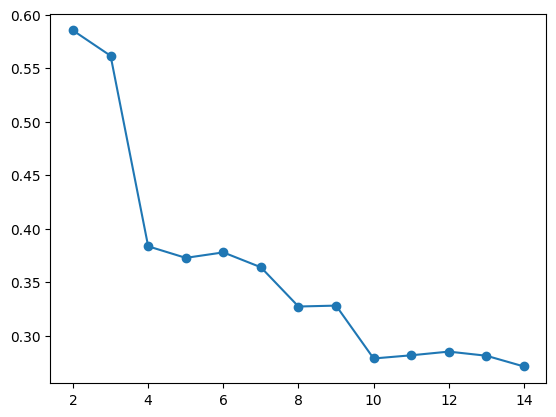

In [34]:
pyplot.plot(range(MINIMUM_CLUSTERS,MAXIMUM_CLUSTERS,ITERATION_VALUE), silhouette_scores, marker= 'o')

In [54]:
OPTIMAL_CLUSTERS = 3
model = KMeans(n_clusters=OPTIMAL_CLUSTERS, init = "k-means++",n_init = 10, max_iter=100, random_state=0)

model.fit(normalized_data)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=0)

In [55]:
clusters = model.labels_

clusters.shape

(21813,)

In [56]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21813 entries, 0 to 39996
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FITC-CD3  21813 non-null  float64
 1   PE-CD8    21813 non-null  float64
 2   ECD-CD19  21813 non-null  float64
 3   PC5-CD45  21813 non-null  float64
 4   PC7-CD3   21813 non-null  float64
 5   Cluster   21813 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 1.1 MB


In [57]:
data_reduced = pd.DataFrame(data_reduced,columns=["Principal Component 1","Principal Component 2"])

In [58]:
data_reduced["Cluster"] = clusters
data_reduced

,Principal Component 1,Principal Component 2,Cluster
0,1.448535,-0.702143,2
1,-0.309685,-0.435169,1
2,1.176317,0.360033,2
3,-1.193992,0.528919,1
4,-0.678558,-0.227277,1
...,...,...,...
21808,-1.325340,0.535499,1
21809,-1.466999,0.858576,1
21810,-0.741593,0.382295,1
21811,-0.825738,0.366258,1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


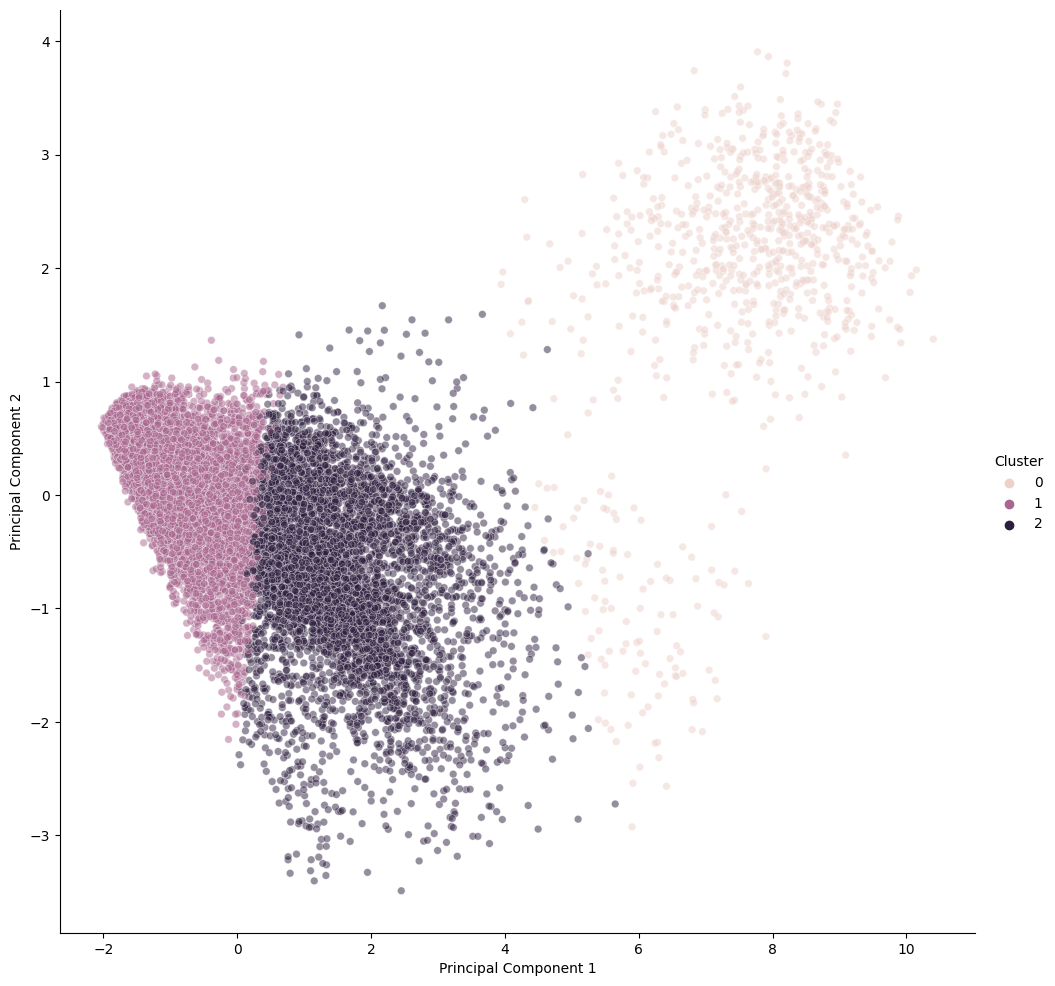

In [59]:
import seaborn

seaborn.pairplot(x_vars = "Principal Component 1", y_vars = "Principal Component 2",
                 data = data_reduced, hue = "Cluster",size = 10, plot_kws = dict(alpha = 0.5, s =30))